# 1. Preliminary

## 1.1 Context

<img src="img/kaggle.png"
     alt="img/kaggle.png" />

## 1.2 Requirements

* pandas
* numpy


* scikit-learn


* matplotlib

## 1.3 Imports

In [10]:
# builtin 
import os


# data
import pandas as pd
import numpy as np


# preprocessing
from sklearn.preprocessing import LabelEncoder
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import roc_curve, auc

# visualisation
import matplotlib.pyplot as plt


## 1.4 Data

<img src="img/tree.jpg"
     alt="img/tree.jpg" />

In [11]:
os.listdir()

['00_EDA.ipynb',
 'requirements.txt',
 'env',
 'img',
 '.ipynb_checkpoints',
 'data',
 '01_modelisation.ipynb']

In [12]:
os.listdir("data/cleaned/")

['df_cleaned.csv']

In [13]:
path     = "./data/cleaned/"        
filename = "df_cleaned.csv"   

In [14]:
df = pd.read_csv(path + filename)
df.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [27]:
df.to_csv("data/cleaned/df_cleaned.csv", index=False)

# 2. Modelisation

## 2.1 Data preparation

In [18]:
X = df.drop(columns="target")
y = df.target

In [19]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [20]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [22]:
print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme  {y_train.shape}  ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme  {y_test.shape}  ")

Nous avons X_train de forme (5686, 22) et y_train de forme  (5686,)  
Nous avons X_test de forme (2438, 22) et y_test de forme  (2438,)  


## 2.2 Dummy classifier

In [23]:
estimator = DummyClassifier()
estimator.fit(X_train, y_train)

DummyClassifier()

In [24]:
estimator.score(X_train, y_train).round(2)

0.52

In [25]:
estimator.score(X_test, y_test).round(2)

0.52

In [26]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y_test.value_counts()

0    1257
1    1181
Name: target, dtype: int64

In [28]:
pd.Series(y_pred).value_counts()

0    2438
dtype: int64

In [ ]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

In [ ]:
def score(estimator):
    """compute and print train score and test score"""
    
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)

    print(f"score train : {tr_score} score test : {te_score} ")

In [ ]:
score(estimator)

In [ ]:
mat = confusion_matrix(y_test, y_pred)
mat

In [ ]:
mat = pd.DataFrame(mat)
mat

In [ ]:
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

In [ ]:
def confusion(y_test, y_pred) : 
    """display a fancy confusion matrix """

    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]
    
    return mat

In [ ]:
confusion(y_test, y_pred)

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5


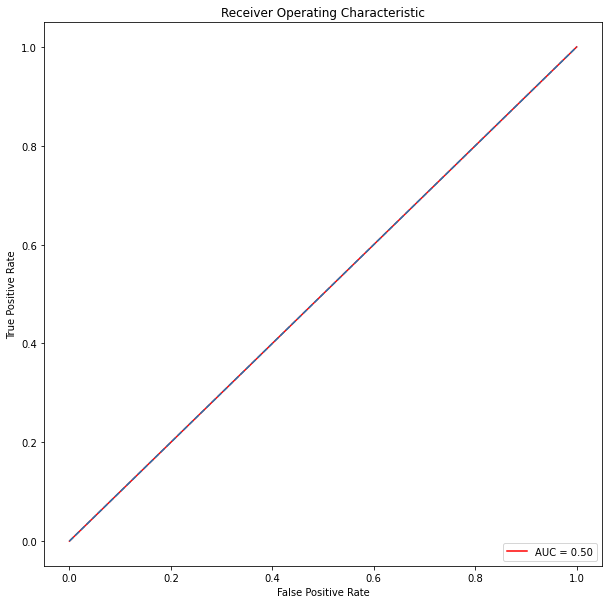

In [30]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

array([[1257,    0],
       [1181,    0]])

,0,1
0,1257,0
1,1181,0


In [33]:
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


## 4.3 Logistic regression

### 4.3.1  Without GridSearch

In [34]:
# Entrainons la Regression Logistique

lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# On récupère la prédiction de la valeur positive
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [36]:
# on peut accéder directement aux probalités de la classe 0 ou 1 de cette façon

y_prob = lr.predict_proba(X_test).round(2)
y_prob

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [37]:
lr.score(X_train, y_train).round(2)

0.95

In [38]:
lr.score(X_test, y_test).round(2)

0.95

In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


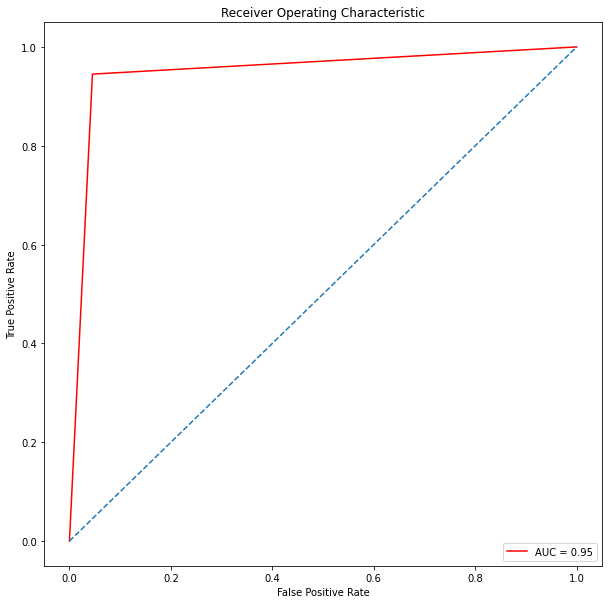

In [40]:

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
mat = confusion_matrix(y_test, y_pred)
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1200,57
test_1,65,1116


### 4.3.2 Using GridSearch

In [42]:
estimator = LogisticRegression(solver = 'liblinear')
params = {  'C': np.logspace(-3, 3, 7) , 
            'penalty':['l1','l2'] }

In [43]:
grid = GridSearchCV(estimator, 
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [44]:
print(grid.best_params_)

{'C': 1000.0, 'penalty': 'l2'}


In [45]:
res = grid.cv_results_
res

{'mean_fit_time': array([0.00770278, 0.01282105, 0.02529407, 0.01128345, 0.08177905,
        0.01784754, 2.30848546, 0.02497673, 3.44870048, 0.04582334,
        3.15832458, 0.06237221, 3.66737905, 0.0789588 ]),
 'std_fit_time': array([0.00204134, 0.00309863, 0.00408326, 0.00247366, 0.00549556,
        0.00448044, 0.47606693, 0.00391344, 0.79685322, 0.01367095,
        0.86703394, 0.01052558, 0.58392591, 0.01149905]),
 'mean_score_time': array([0.00157013, 0.00157166, 0.00110617, 0.00079961, 0.00098281,
        0.00070081, 0.00103493, 0.00129738, 0.00108318, 0.00068212,
        0.00085907, 0.00100379, 0.00073495, 0.00096927]),
 'std_score_time': array([6.17333403e-04, 6.84255939e-04, 6.02389924e-04, 5.61112744e-05,
        5.72779970e-04, 3.24346023e-05, 6.50174405e-04, 8.01145015e-04,
        5.66515002e-04, 4.53253723e-05, 2.82316569e-04, 5.65313416e-04,
        4.00729363e-05, 5.56617482e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1.0, 1.0, 10.0,
       

In [46]:
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007703,0.002041,0.001570,0.000617,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.772408,0.764292,0.788039,...,0.771368,0.008799,14,0.771108,0.773137,0.767202,0.772917,0.772477,0.771368,0.002199
1,0.012821,0.003099,0.001572,0.000684,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.870826,0.857520,0.872471,...,0.866689,0.005224,13,0.865435,0.869642,0.866784,0.866564,0.867443,0.867174,0.001393
2,0.025294,0.004083,0.001106,0.000602,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.905097,0.890941,0.897098,...,0.897994,0.004511,12,0.897537,0.899978,0.902616,0.896900,0.898879,0.899182,0.002021
3,0.011283,0.002474,0.000800,0.000056,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.908612,0.905893,0.906772,...,0.907140,0.002653,11,0.909191,0.907892,0.914047,0.907013,0.908332,0.909295,0.002478
4,0.081779,0.005496,0.000983,0.000573,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.953427,0.941953,0.944591,...,0.945127,0.004238,9,0.943931,0.945043,0.946362,0.944823,0.945043,0.945040,0.000778
5,0.017848,0.004480,0.000701,0.000032,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.942882,0.933157,0.934916,...,0.934223,0.004784,10,0.932718,0.935151,0.937569,0.934491,0.934711,0.934928,0.001559
6,2.308485,0.476067,0.001035,0.000650,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.966608,0.948989,0.948989,...,0.951809,0.007441,6,0.962401,0.954276,0.956034,0.948780,0.953396,0.954977,0.004419
7,0.024977,0.003913,0.001297,0.000801,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.958699,0.944591,0.947230,...,0.947061,0.006243,8,0.950748,0.950319,0.949879,0.946801,0.947681,0.949086,0.001556
8,3.448700,0.796853,0.001083,0.000567,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.978032,0.951627,0.952507,...,0.957260,0.010482,4,0.972955,0.956034,0.960651,0.953616,0.958013,0.960254,0.006758
9,0.045823,0.013671,0.000682,0.000045,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.966608,0.946350,0.948989,...,0.950402,0.008236,7,0.959543,0.952737,0.954056,0.948340,0.948780,0.952691,0.004075


In [47]:
cols = [i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [48]:
res = res[cols]
res = res.sort_values("rank_test_score")
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
13,0.078959,0.011499,0.000969,0.000557,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.959370,0.009776,1,0.962232,0.006608
12,3.667379,0.583926,0.000735,0.000040,1000.0,l1,"{'C': 1000.0, 'penalty': 'l1'}",0.958315,0.010452,2,0.961837,0.006630
10,3.158325,0.867034,0.000859,0.000282,100.0,l1,"{'C': 100.0, 'penalty': 'l1'}",0.957436,0.010759,3,0.961309,0.006587
8,3.448700,0.796853,0.001083,0.000567,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.957260,0.010482,4,0.960254,0.006758
11,0.062372,0.010526,0.001004,0.000565,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.956908,0.010808,5,0.960430,0.006500
6,2.308485,0.476067,0.001035,0.000650,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.951809,0.007441,6,0.954977,0.004419
9,0.045823,0.013671,0.000682,0.000045,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.950402,0.008236,7,0.952691,0.004075
7,0.024977,0.003913,0.001297,0.000801,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.947061,0.006243,8,0.949086,0.001556
4,0.081779,0.005496,0.000983,0.000573,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.945127,0.004238,9,0.945040,0.000778
5,0.017848,0.004480,0.000701,0.000032,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.934223,0.004784,10,0.934928,0.001559


In [56]:
estimator = LogisticRegression(solver = 'liblinear', penalty="l2", C=1000)
estimator.fit(X_train, y_train)

LogisticRegression(C=1000, solver='liblinear')

In [57]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

score train : 0.98 score test : 0.97 


In [58]:
2/5

0.4

In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


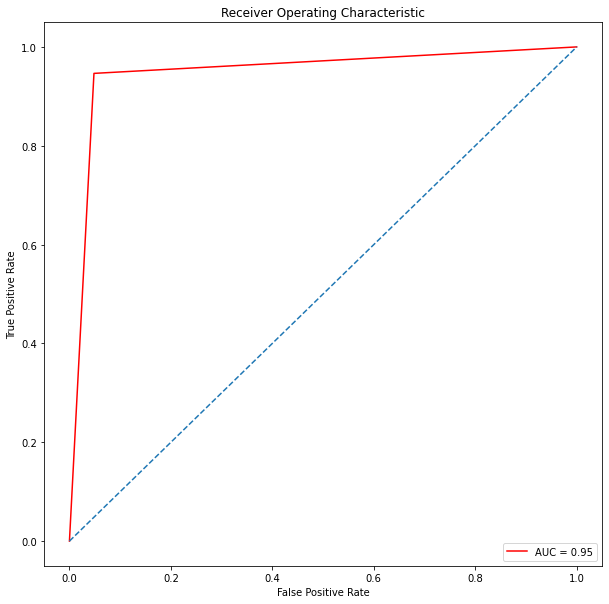

In [60]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
mat = confusion_matrix(y_test, y_pred)
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1201,61
test_1,63,1113


## 4.4 SVM

### 4.4.1 with Gridsearch

In [62]:
estimator = LinearSVC()

params = { 'C': np.logspace(-3, 3, 7) }

In [63]:
grid = GridSearchCV(estimator, 
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, verbose=1)

In [64]:
print(grid.best_params_)

{'C': 1.0}


In [65]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i]
res = res[cols]
res.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,0.303587,0.014362,0.002920,0.001915,1.0,{'C': 1.0},0.953392,0.008127,1,0.953526,0.002517
5,0.307858,0.019061,0.001490,0.000751,100.0,{'C': 100.0},0.949528,0.008770,2,0.950887,0.013329
2,0.239195,0.020041,0.001955,0.001923,0.1,{'C': 0.1},0.948645,0.004718,3,0.949349,0.001144
1,0.030383,0.003192,0.001072,0.000604,0.01,{'C': 0.01},0.944072,0.002992,4,0.944865,0.001771
6,0.251678,0.065940,0.001385,0.001112,1000.0,{'C': 1000.0},0.933518,0.017831,5,0.934665,0.020715
0,0.006169,0.000758,0.000920,0.000397,0.001,{'C': 0.001},0.914526,0.003092,6,0.915362,0.000828
4,0.306734,0.016606,0.001512,0.001191,10.0,{'C': 10.0},0.887960,0.071486,7,0.890171,0.071815


In [66]:
estimator = LinearSVC(C=1.0)
estimator.fit(X_train, y_train)

/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100.0)

In [67]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

score train : 0.93 score test : 0.93 


In [68]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.93


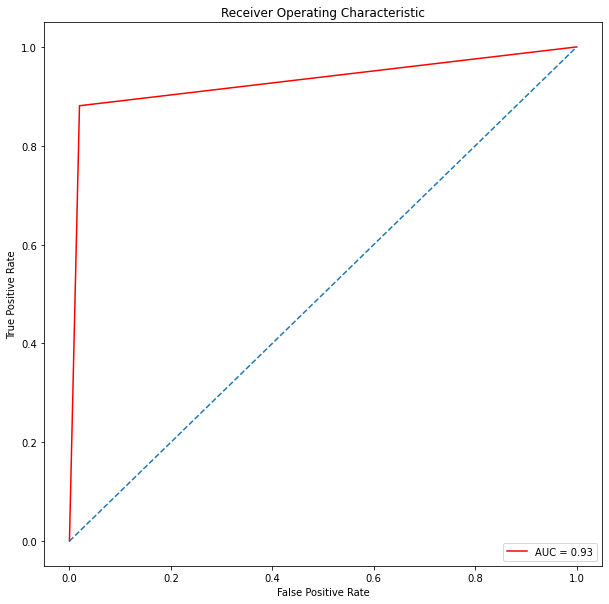

In [70]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
mat = confusion_matrix(y_test, y_pred)
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1237,25
test_1,140,1036
